
# Exercise on resource allocation: the 'ERA' model

## Description of the 'ERA' whole-cell coarse-grained model

We consider an extremely simplified representation of a cell:

<img src='ERA-model-scheme.png' width=50%/>

As depicted above, the cell is made of only three coarse-grained molecular components: two types of proteins, $E$ and $R$, and a single species $A$ representing both protein precursors and energy.

* The job of $E$ proteins is to convert external nutrients into protein precursors $A$

* The job of $R$ proteins is to convert protein precursors $A$ into proteins ($E$ or $R$)

* We call $k$ the efficiency of transport and metabolism, i.e. protein precursors $A$ are produced at rate $k E$

* $\sigma$ and $a_{sat}$ are the enzymatic constants for $R$, i.e. the total rate of protein synthesis (which is also the consumption rate of $A$) is $\sigma \frac{a}{a+a_{sat}} R$ where $a = A / V$ is the concentration of protein precursors $A$

* The fractions $f_E$ and $f_R = 1 - f_E$ represent the cell proteome allocation, i.e. how much of total protein synthesis is invested in $E$ and $R$ proteins respectively 

* We assume that the cell maintains a constant mass density, so that the cell volume is always proportional to the cell  mass, which is equal to $E + R + A$ (we assume that $E$, $R$ and $A$ have the same mass). We choose the mass and volume units so that $M = V$. This means that mass fractions and concentrations are equivalent

## Interactive exploration of the model behavior

To explore how the model works in order to answer the questions (**they are after !**), you can play with the interactive simulations and plots below.

$\sigma$ has been fixed to 1 (it is just setting the time unit). $a_{sat}$ has been set to $0.01$.

In [1]:
# run this cell (by pressing SHIFT + ENTER when it is selected) to get started
import ERA_model_simulator

Exploration of the model behavior (press Run Interact to update)


interactive(children=(FloatSlider(value=0.0, description='fE', max=1.0, step=0.01), FloatSlider(value=5.0, des…

Exploration of model behavior using the concentration ODEs (press Run Interact to update)


interactive(children=(FloatSlider(value=0.0, description='fE', max=1.0, step=0.01), FloatSlider(value=5.0, des…

Exploration of how the allocation strategy impacts the growth rate (press Run Interact to update)


interactive(children=(FloatSlider(value=5.0, description='k', max=10.0, min=0.01, step=0.01), FloatSlider(valu…

## Questions with answers

1) What is represented by $R$? What are the generic names for the enzymatic constants $\sigma$ and $a_{sat}$?

> $R$ stands for ribosomes. $\sigma$ and $a_{sat}$ are also called $k_{cat}$ and $K_M$ in the standard notation of Michaelis-Menten.

2) In your opinion, should $k$ depends on the composition of the media? And on the strain genotype?

> $k$ should depend on the media because in a rich media, cells can get the same amount of precursors with a lower amount of enzymes involved in transport and metabolism. $k$ should also depend on the strain genotype, because different strains have a priori different metabolic capabilities.

3) Write down differential equations representing the temporal evolution of the **amounts** of $A$, $E$ and $R$

> $\frac{dA}{dt} = k E - R \sigma \frac{a}{a+a_{sat}}$

> $\frac{dE}{dt} = f_E R \sigma \frac{a}{a+a_{sat}}$

> $\frac{dR}{dt} = (1-f_E) R \sigma \frac{a}{a+a_{sat}}$

4) Find a simple expression for the instantaneous cell growth rate $\alpha = \frac{1}{V} \frac{dV}{dt}$ (think mass conservation and combine the differential equations)

> Summing the three differential equations gives: $\frac{d(A+E+R)}{dt} = k E$

> Because $M = V = E + R + A$, we have $\alpha = \frac{1}{V}\frac{dV}{dt} = k e$

5) **BONUS question - not required to continue**. Write down differential equations representing the temporal evolution of the **concentrations** $a$, $e$ and $r$ of $A$, $E$ and $R$

> We have generally that $\frac{d(X/V)}{dt} = \frac{\frac{dX}{dt} V - X \frac{dV}{dt}}{V^2}$

> Therefore here we have: $\frac{d(X/V)}{dt} = \frac{\frac{dX}{dt} - X \alpha}{V}$

> That is: $\frac{d(X/V)}{dt} = \frac{\frac{dX}{dt}}{V} - x \alpha$ where $x = \frac{X}{V}$

> We recognize the classic 'dilution term' on the right !

> Therefore the differential equations for concentrations are:

> $\frac{da}{dt} = k e - r \sigma \frac{a}{a+a_{sat}} - k e a$

> $\frac{de}{dt} = f_E r \sigma \frac{a}{a+a_{sat}} - k e^2$

> $\frac{dr}{dt} = (1-f_E) r \sigma \frac{a}{a+a_{sat}} - k e r$

6) **BONUS question - not required to continue**. Solve the steady-state of the model. Hint: Eliminate $e$ and $r$ to find an equation in *a*

> We equate the derivatives above to zero to get:

> $0 = k e - r \sigma \frac{a}{a+a_{sat}} - k e a$

> $0 = f_E r \sigma \frac{a}{a+a_{sat}} - k e^2$

> $0 = (1-f_E) r \sigma \frac{a}{a+a_{sat}} - k e r$

> The first equation gives us $r \sigma \frac{a}{a+a_{sat}} = k e (1 - a)$. When plugged in the two others we obtain:

> $k e^2 = f_E k e (1 - a)$ and then $e = f_E (1 - a)$

> $ k e r = f_R k e (1 - a)$ and then $r = f_R (1 - a)$

> We can then eliminate $e$ and $r$ in the first equation to find $k f_E (1 - a) = \sigma f_R \frac{a}{a + a_{sat}}$

> Those two expressions for the growth rate only involves $a$ and has a unique solution for $a \in [0,1]$

7) This model seems to always reach a state of steady (or balanced) exponential growth, where all components increase at the same (exponential rate), while the concentrations of components remain constant. To which extent is this steady-state dependent on initial conditions?

> To get 'started' you need at least some protein synthesis, so starting with 0 ribosomes will always lead to zero ribosomes. Also, if starting with 0 $E$ you need some $A$ otherwise $A$ will never be positive. Otherwise we expect to converge to the only 'non-degenerate' steady-state independently on the initial conditions

8) What growth rate and concentrations do you expect at steady-state for the extreme cases $f_E = 0$ and $f_E = 1$?

> If $f_E = 0$, we never make any new $E$, so eventually it will be diluted by growth. Then $A$ should also be diluted, so we expect to converge to $r = 1$ and $e = a = 0$. 

> If $f_E = 1$, eventually we will dilute our ribosomes $R$, so import and metabolism will be the dominant process, so we expect to converge to $a = 1$ and $e = r = 0$.

9) From now own we will fix $\sigma = 1$ and $a_{sat} = 0.01$ (this is the case for the interactive simulations and plots above). Propose a fixed allocation strategy (i.e. a value for $f_E$) for the four following conditions: $k = 0.1$, $k = 0.25$, $k = 1$ and $k = 2.5$. Your goal is to grow as fast as possible !

> Using the interactive plots for growth rate vs $f_E$ we find:

> $k = 0.1$, $f_E^{best} = 0.9$

> $k = 0.25$, $f_E^{best} = 0.75$

> $k = 1$, $f_E^{best} = 0.5$

> $k = 2.5$, $f_E^{best} = 0.3$

10) Describe with your words what governs how good a given choice of $f_E$ is. What trade-off seems to be at play here?

> There is a fundamental trade-off between the efficiency of transport and metabolism and the efficiency of protein synthesis. If too much is invested in transport and metabolism as compared to what the protein synthesis machinery can handle, the cell will accumulate precursors $A$ that it cannot transform into proteins fast enough. Because $A$ eventually take space, this dilute both $E$ and $R$ and everything is less efficient. 

> On the contrary, if too little is invested in transport and metabolism, $A$ precursors are immediately consumed after being produced and ribosomes are not efficient because of very low substrate concentration.

> Therefore the cell needs to find the maximal transport and metabolism investment such that the resulting production rate of precursors $A$ can be handled by the resulting protein synthesis machinery.

11) **Open question**. Let's assume that a cell can dynamically regulate or adapt its allocation strategy represented by the value $f_E$. Let's also assume that a cell can only sense **ONE** of the three internal concentration $e$, $r$ and $a$. What would you choose to sense in order to adapt the value of $f_E$? Let's call it $x$. Propose a dynamic regulation function $f_E = f(x)$ that you think is good (i.e., allows you to grow near optimally for a large range of environments, represented by different values of $k$). Don't forget that $f_E = 1 - f_R$, so you can also decide to have $f_R$ being primarily regulated. Hint 1: supply-driven activation. Hint 2: cf Weisse et al., 2015 paper.

> The concentration $a$ of precursors $A$ is the best quantity to measure because it tells us something about the relative efficiency of the two processes (transport and metabolism vs protein synthesis).

> If $a$ is large, it means the transport and metabolism is too efficient, so we should increase $f_R$. If $a$ is low, its the opposite problem and $f_E$ should be increased.

> The function $f_R = 5 * a$ works well !

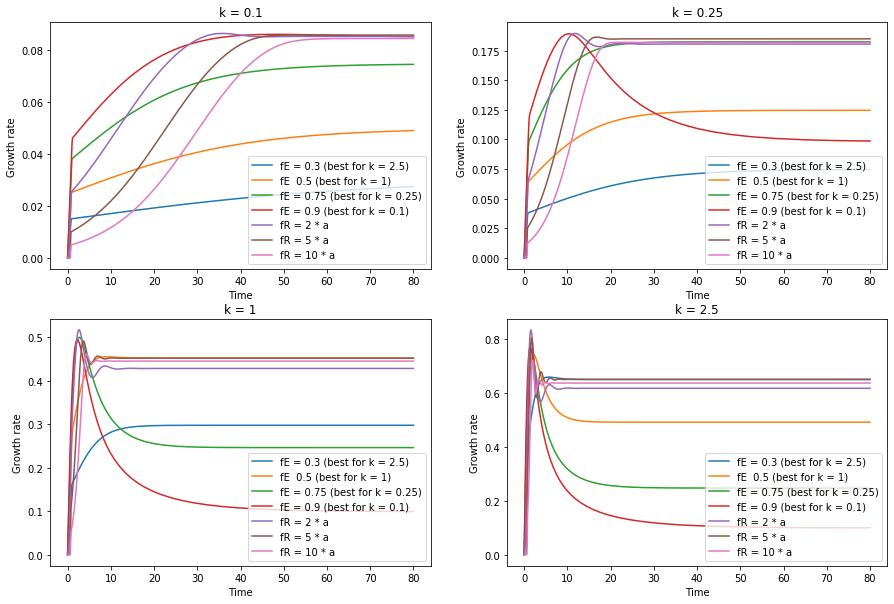

In [2]:
def fE_cst_0_9(e,r,a):
    return 0.9

def fE_cst_0_75(e,r,a):
    return 0.75

def fE_cst_0_5(e,r,a):
    return 0.5

def fE_cst_0_3(e,r,a):
    return 0.3

def fR_2_a(e,r,a):
    fR = 2 * a
    fE = 1 - fR
    return fE

def fR_5_a(e,r,a):
    fR = 5 * a
    fE = 1 - fR
    return fE

def fR_10_a(e,r,a):
    fR = 10 * a
    fE = 1 - fR
    return fE

fE_reg_funs = [('fE = 0.3 (best for k = 2.5)',fE_cst_0_3), 
           ('fE  0.5 (best for k = 1)',fE_cst_0_5), 
           ('fE = 0.75 (best for k = 0.25)',fE_cst_0_75),
           ('fE = 0.9 (best for k = 0.1)',fE_cst_0_9),
           ('fR = 2 * a',fR_2_a),
           ('fR = 5 * a',fR_5_a),
           ('fR = 10 * a',fR_10_a)]

ERA_model_simulator.compare_regulation_functions(fE_reg_funs)